<h2>Get the article from internet</h2>

In [15]:
import requests
from xml.etree import ElementTree
# Example is 2023年行政長官施政報告
url = "https://www.ceo.gov.hk/public/open-data/tc/policy_address/pa2023.xml"

# Make the HTTP request
response = requests.get(url)

# Parse the XML content
root = ElementTree.fromstring(response.text)

# Function to extract text recursively
def extract_text(element):
    text = ""
    if element.text:
        text += element.text.strip().replace("\n", " ")
    for child in element:
        text += extract_text(child)
    if element.tail:
        text += element.tail.strip().replace("\n", " ")
    return text

# Extract the text content
text_content = extract_text(root)

# Print the extracted text
# print(text_content)

<h2>用 jieba 分析出詞彙</h2>

In [16]:
import jieba
list_1 = []
segments = jieba.cut(text_content)
for seg in segments:
    list_1.append(seg)
print('總共有多少個詞彙：', len(list_1))

總共有多少個詞彙： 27131


In [17]:
import collections
counter_1 = collections.Counter(list_1)
print("顯示頭 10 個詞彙：")
for key, value in counter_1.most_common(10):
    print(key, ": ", value)

顯示頭 10 個詞彙：
  :  4960
， :  1323
的 :  651
。 :  429
、 :  346
「 :  340
」 :  340
— :  320
和 :  298
香港 :  221


<h2>篩走無意義詞彙</h2>

In [34]:
import jieba
# declare 3 lists
lstSegm = []
lstStopWord = []

# 1. fill stop word list by importing the text file
with open('stopWords.txt', 'r', encoding='UTF-8') as file:
    for data in file:
        data = data.strip() # eliminate the space
        lstStopWord.append(data)
# 2. fill the Segment list by jieba 
lstSegm = jieba.cut(text_content)
# 3. fill the remainder word (i.e. new segment list) list by filtering out stop word list
#lstNewSegm   = [x for x in lstSegm if x not in lstStopWord and x!='\n'] #李友強教
#print('李友強：', len(lstNewSegm))
lstStopWord_2 = ['\n', ' ', '—', '.', '為', '爲']
lstNewSegm_2 = list(filter(lambda x: x not in lstStopWord and x not in lstStopWord_2, lstSegm)) # lausir999教
print('lausir999: ', len(lstNewSegm_2))
# note: 李友強 與 lausir999 教的方法不可以同時使用，
# 但他們得出的答案同樣是 20494

lausir999:  14853


In [35]:
import collections
counter_2 = collections.Counter(lstNewSegm_2)
print("顯示頭 10 個詞彙：")
for key, value in counter_2.most_common(10):
    print(key, ": ", value)

顯示頭 10 個詞彙：
香港 :  221
政府 :  187
發展 :  181
包括 :  116
我們 :  100
提供 :  100
服務 :  99
計劃 :  82
明年 :  77
加强 :  75


<h2>使用 WordCloud</h2>

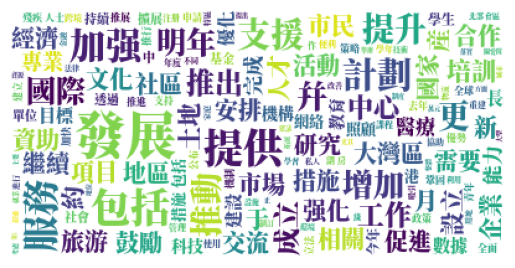

Word cloud of article is saved.


In [37]:
import  matplotlib.pyplot as plt
from  wordcloud import  WordCloud

text_3 = " ".join(lstNewSegm_2)
stopwords = {}.fromkeys(['我們', '政府', '香港'])
wc=WordCloud(
    font_path='NotoSerifCJKtc-Black.otf',
    background_color='white',
    max_words=200, # top 200 words
    stopwords=stopwords
)
wc.generate(text_3)
plt.imshow(wc)
plt.axis('off')
plt.show()
wc.to_file('..\\output05\\wordcloud_article.jpg')
print("Word cloud of article is saved.")